Just a short explanation of what's going on when we wrap an image into view that works with Zernike polynomials

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import glob
import os.path
import sys

import numpy as np
import scipy as sp
import scipy.io as sio # To import Matlab stuff
import scipy.ndimage
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
sys.path.append('../antworld')
from world_viewer import WorldViewer

First create a view

In [4]:
world_folder = '../data/seville/'
world_name = 'world5000_gray'
matlab_world  = sio.loadmat(world_folder + world_name + '.mat')

In [5]:
X = matlab_world['X']
Y = matlab_world['Y']
Z = matlab_world['Z']
colp = matlab_world['colp']

In [6]:
wv = WorldViewer(X, Y, Z, colp[:,0],
                 resolution=1,
                 hfov_deg=360.0,
                 v_max=np.pi/2,
                 v_min=-np.pi/12,
                 data_folder='../data/world_images',
                 world_name='notebook')

In [7]:
x=5
y=5
th=0
wv.save_view(x=x, y=y, th=th)

(360, 104)

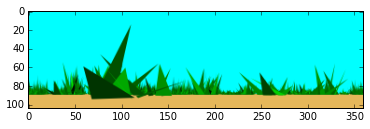

In [8]:
im = Image.open('../data/world_images/notebook/05.00x_05.00y_00.01z_0.00th_360fov.png')
im = im.convert('RGB')
data = np.array(im)
plt.imshow(data)

w, h = im.size
w, h

In [9]:
x_range = np.linspace (-1, 1, h*2)
xx, yy = np.meshgrid(x_range, x_range)

In [10]:
def cart2polar(x, y):
    phi = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return theta, phi

In [11]:
th, ph = cart2polar(xx, yy)

In [12]:
theta = (th / np.max(th) + 1) * (w-1)/2
print np.max(theta)
print np.min(theta)

359.0
0.0


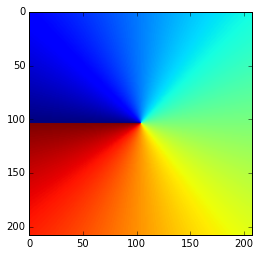

In [13]:
plt.imshow(theta)

In [14]:
phi = ph * (h-1)
print np.max(phi)
print np.min(phi)
print np.sqrt(np.max(phi)**2 / 2)


145.663996924
0.703690806398
103.0


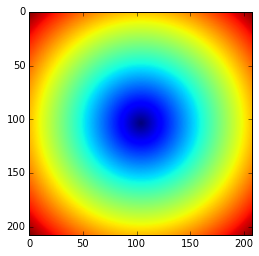

In [15]:
plt.imshow(phi)

In [16]:
coords = np.vstack((theta.flatten(), phi.flatten()))

For colour images...

In [17]:
bands = []
for band in data.T: # R, G, B
    zi = sp.ndimage.map_coordinates(band, coords, order=1)
    bands.append(zi.reshape((h*2, h*2)))
    
output = np.dstack(bands)

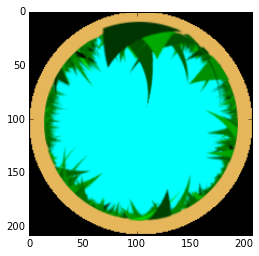

In [18]:
plt.imshow(output)

For grayscale just skip the bands thing